In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import ipywidgets as widgets

# Load basic science tools
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy.random import rand, randint, uniform, choice, normal, randn, random 

import warnings
warnings.filterwarnings('ignore')

## Quantum harmonic Oscillator

In [3]:
from scipy.special import hermite
from math import factorial

**Using recursion of Hermite polynomials or the ladder  operators we can obtain each eigenfunction from two lower ones.**

$$\psi_n(z)  = \Big(\frac{2}{n} \Big)^{1/2} z \psi_{n-1}(z) - \Big(\frac{n-1}{n} \Big)^{1/2}\psi_{n-2}(z) $$

In [18]:
def psi_r(n, z):
    
    '''Eigenfunctions of 1D Harm Osc in dimensionless units, m=1,h=1, omega=1
    We make use of recursion relation (ladder operator property) to obtain all eigenfunctions.
    '''

    if   n == 0:
        
        return np.exp(-z ** 2 / 2.0) / np.pi ** 0.25 #psi_0
    
    elif n == 1:
        
        return np.sqrt(2.0) * z * psi(0, z) #psi_1
    
    else: 
        
        return np.sqrt(2.0 / n) * z * psi(n - 1,z) - np.sqrt((n - 1.0) / n) * psi(n - 2,z) #psi_n

**Alternatively we can get all wavefunctions straight from hermite polynomials.**

In [19]:
def psi(n, x):
    
    """Harmonic oscillator wavefunction for level 
    n computed on grid of points x"""
     
    Herm = hermite(n) 
    
    return Herm(x) * np.exp(-0.5*x**2) / np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

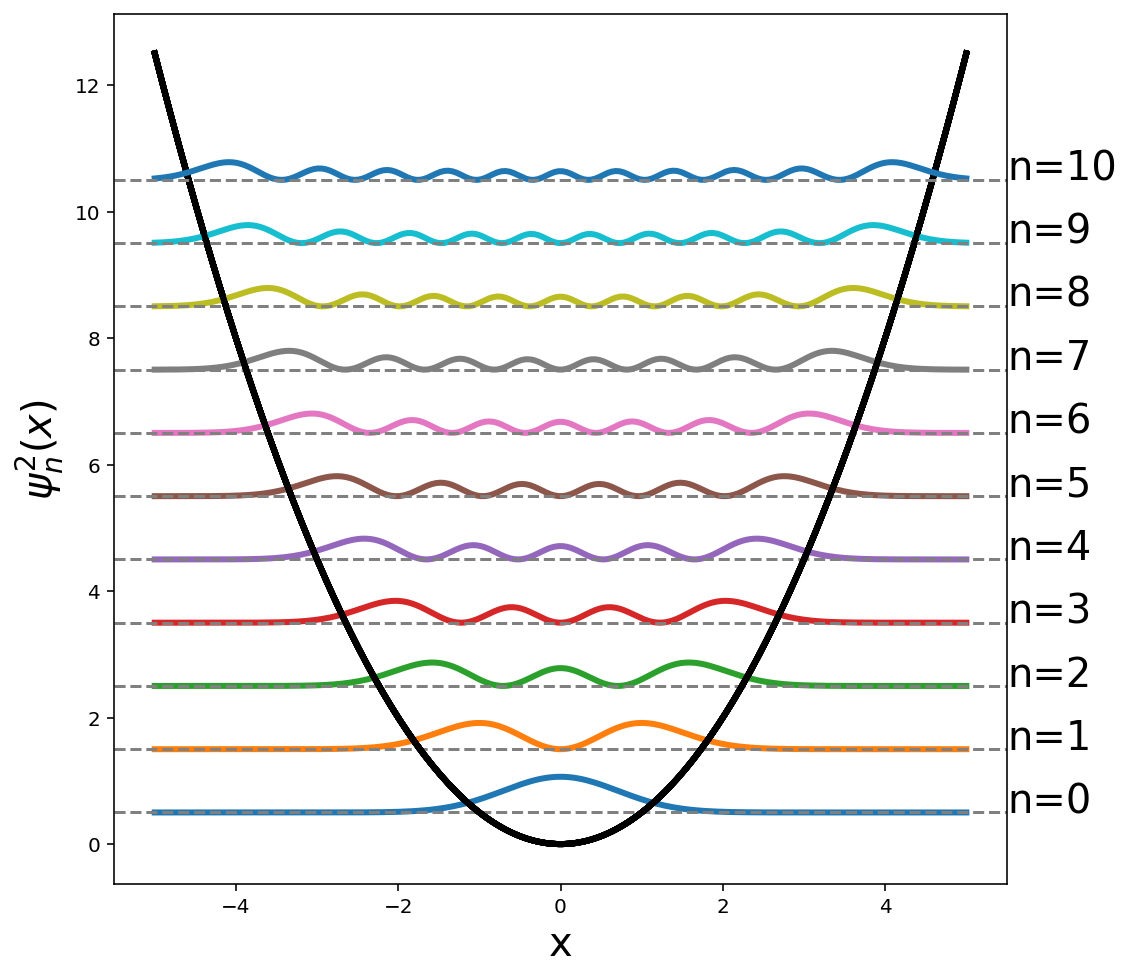

In [43]:
x = np.linspace(-5,5,200)

fig, ax = plt.subplots(figsize=(8,8))

for n in range(11):
     
    E_n    = (n+0.5)
    V_x    = 0.5*x**2
    
    ax.plot(x, V_x,  color='k', lw=3)
    ax.plot(x, psi(n,x)**2 + E_n, lw=3)
    
    ax.axhline(E_n, color='gray', linestyle='--') 
    ax.text(1.1*max(x), E_n, f"n={n}", fontsize=20)

    
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('$\psi^2_n(x)$',fontsize=20);

In [21]:
@widgets.interact(n=(0,100))
def plot_psi(n=0):
    
    x = np.linspace(-20,20,1000)
    
    
    plt.plot(x, psi(n,x)**2, lw=2)
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)

interactive(children=(IntSlider(value=0, description='n'), Output()), _dom_classes=('widget-interact',))

## Introducing Density matrix 

$$Z(\beta) = \sum_n e^{-\beta E_n} $$

$$\rho(x, x',\beta) = \sum_n e^{-\beta E_n}\psi_n(x) \psi^{*}_n(x)$$

$$Z(\beta) = Tr \rho = \int dx \rho(x,x,\beta)$$

### Free particle density matrix

$$\rho_{free}(x, x', \beta) = \Big(\frac{m}{2\pi \hbar^2 \beta} \Big)^{1/2} e^{-\frac{m(x-x')^2}{2\hbar^2 \beta}}$$

### Harmonic oscillator density matrix

$$\rho_{ho}(x,x,\beta) = \Big(\frac{1}{2\pi sinh (\beta)} \Big)^{1/2} e^{-x^2 tanh \big( \frac{\beta}{2}\big)}$$

### Trotter approximation

In the high temperature limit $\beta \approx 0$ we have an approximatioin

$$\rho(x, x', \beta) \rightarrow e^{-\frac{1}{2}\beta V(x)} \rho_{free}(x,x',\beta) e^{-\frac{1}{2}V(x')} $$

### Visualizing density matrix of harmonic oscillator

In [48]:
def density(x, y, kBT, n_states=20):
    
    rho = 0
    
    for n in range(n_states):
        
        E_n = (n+0.5)
    
        rho += psi(n,x) * psi(n,y) * np.exp(-E_n/kBT)
    
    return rho

In [49]:
x        = np.linspace(-5,5,100)
X,Y      = np.meshgrid(x,x)

@widgets.interact(kBT=(0.1,10))
def plot_rho_xy(kBT=0.1):

    Rho = density(X, Y, kBT)

    plt.pcolormesh(Rho)

interactive(children=(FloatSlider(value=0.1, description='kBT', max=10.0, min=0.1), Output()), _dom_classes=('…

In [51]:
@widgets.interact(kBT=(0.1,10))
def plot_rho_xy(kBT=0.1):
    
    x   = np.linspace(-5,5,100)
    plt.plot(x, density(x,x,kBT))
    plt.ylim(0,1)

interactive(children=(FloatSlider(value=0.1, description='kBT', max=10.0, min=0.1), Output()), _dom_classes=('…

### Freee vs Harmonic oscilator density matrix

In [13]:
def funct_rho_free(x, xp, beta):
    
    '''Density matrix for a free particle (exact) '''
    
    norm = np.sqrt(2.0 * np.pi * beta)
    
    dist_x = np.exp(-(x - xp) ** 2 / (2.0 * beta))
    
    return dist_x/norm

beta = 0.1
nx = 300
L = 10.0
x = [-L / 2.0 + i * L/(nx - 1) for i in range(nx)]
                    
rho_free, rho_harm = [], []

for i in range(nx):
                    
    rho_free.append([funct_rho_free(x[i], x[j], beta) for j in range(nx)])
                    
    rho_harm.append([rho_free[i][j] * np.exp(- beta * x[i] ** 2 / 4.0 -
                     beta * x[j] ** 2 / 4.0) for j in range(nx)])

Text(0.5, 1.0, '$\\beta$=0.1 (harmonic)')

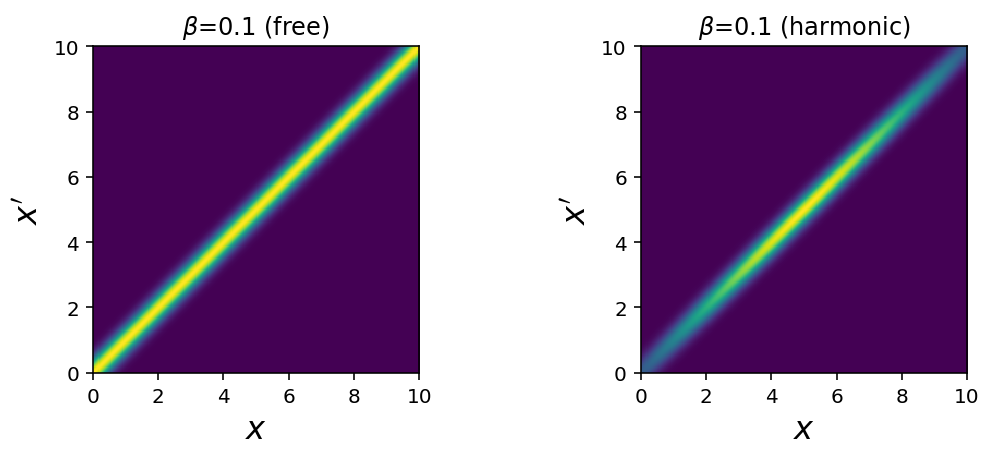

In [14]:
# free particle
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(9,3))

ax[0].imshow(rho_free, extent=[0.0, L, 0.0, L], origin='lower')
ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylabel('$x\'$', fontsize=16)
#ax[0].colorbar()
ax[0].set_title('$\\beta$=%s (free)' % beta)


# harmonic potential
ax[1].imshow(rho_harm, extent=[0.0, L, 0.0, L], origin='lower')
ax[1].set_xlabel('$x$', fontsize=16)
ax[1].set_ylabel('$x\'$', fontsize=16)

ax[1].set_title('$\\beta$=%s (harmonic)' % beta)

### Harmonic oscillator problem of QM via Matrix squaring (Trotter approximation)

Text(0, 0.5, "$x'$")

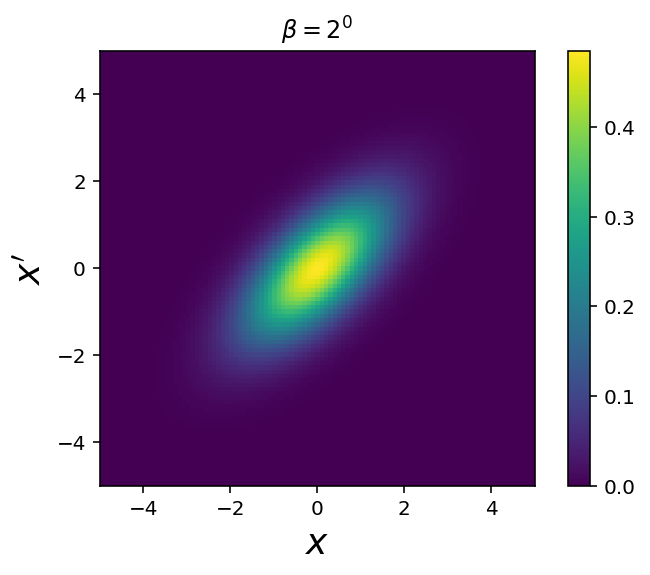

In [19]:
# Free off-diagonal density matrix

def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)] 
beta_tmp = 2.0 ** (-8)                   # initial value of beta (power of 2)
beta     = 2.0 ** 0                      # actual value of beta (power of 2)
rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta

while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0

# graphics output
pylab.imshow(rho, extent=[-x_max, x_max, -x_max, x_max], origin='lower')
pylab.colorbar()
pylab.title('$\\beta = 2^{%i}$' % math.log(beta, 2))
pylab.xlabel('$x$', fontsize=18)
pylab.ylabel('$x\'$', fontsize=18)

### Naive MCMC path sampling of quantum harmonic oscillator

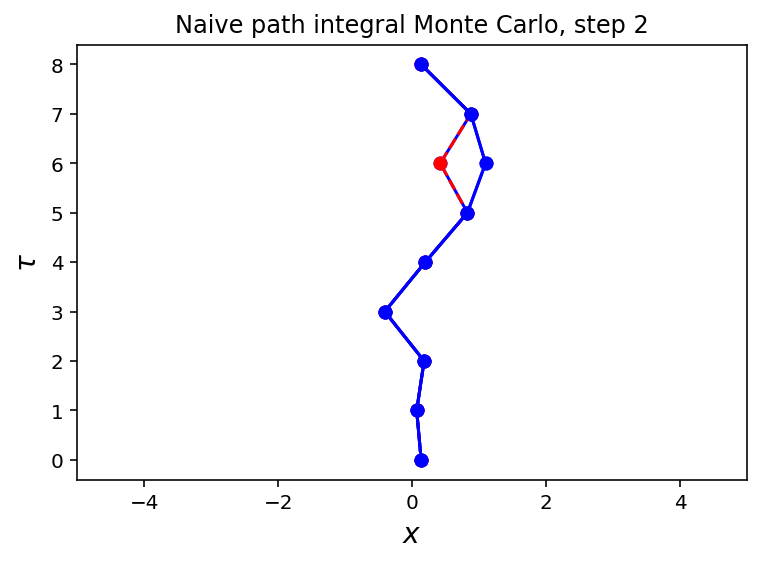

In [70]:
def rho_free(x, y, beta):        # free off-diagonal density matrix
    
    return math.exp(-(x - y) ** 2 / (2.0 * beta))


def show_path(x, k, x_old, Accepted, step):
    
    path = x + [x[0]]
    y_axis = range(len(x) + 1)
    
    if Accepted:
        
        old_path = x[:]
        old_path[k] = x_old
        old_path = old_path + [old_path[0]]
        plt.plot(old_path, y_axis, 'ro--', label='old path')
        
    plt.plot(path, y_axis, 'bo-', label='new path')
    plt.xlim(-5.0, 5.0)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$\\tau$', fontsize=14)
    plt.title('Naive path integral Monte Carlo, step %i' % step)


beta = 4.0
N = 8                                                # number of slices
dtau = beta / N
delta = 1.0                                          # maximum displacement on one slice
n_steps = 2                                         # number of Monte Carlo steps
x = [uniform(-1.0, 1.0) for k in range(N)]    # initial path
show_path(x, 0, 0.0, False, 0)

for step in range(n_steps):
    
    
    k =  randint(0, N - 1)                     # randomly choose slice
    
    knext, kprev = (k + 1) % N, (k - 1) % N          # next/previous slices
    
    x_old = x[k]
    
    x_new = x[k] + uniform(-delta, delta)     # new position at slice k
    
    old_weight  = (rho_free(x[knext], x_old, dtau) *
                   rho_free(x_old, x[kprev], dtau) *
                   np.exp(-0.5 * dtau * x_old ** 2))
    
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   np.exp(-0.5 * dtau * x_new ** 2))
    
    Accepted =  uniform(0.0, 1.0) < new_weight / old_weight
    
    if Accepted:
        
        x[k] = x_new

    show_path(x, k, x_old, Accepted, step + 1)

### Direct Path sampling

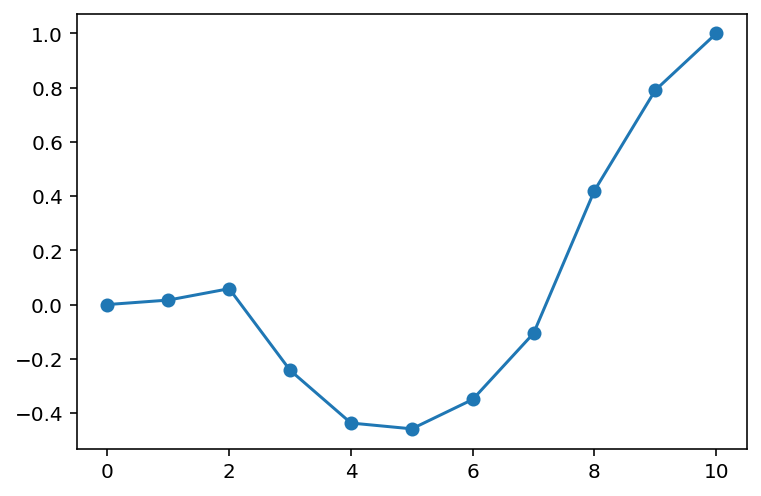

In [82]:
beta = 1.0
N = 10
dtau = beta / N
nsteps = 1000                      # number of paths to be generated
xstart, xend = 0.0, 1.0          # initial and final points

for step in range(nsteps):
    
    x = [xstart]
    
    for k in range(1, N):        # loop over internal slices
        
        dtau_prime = (N - k) * dtau
        
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        
        sigma = np.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        
        x.append(normal(x_mean, sigma))
        
    x.append(xend)
    
plt.plot(x, '-o')

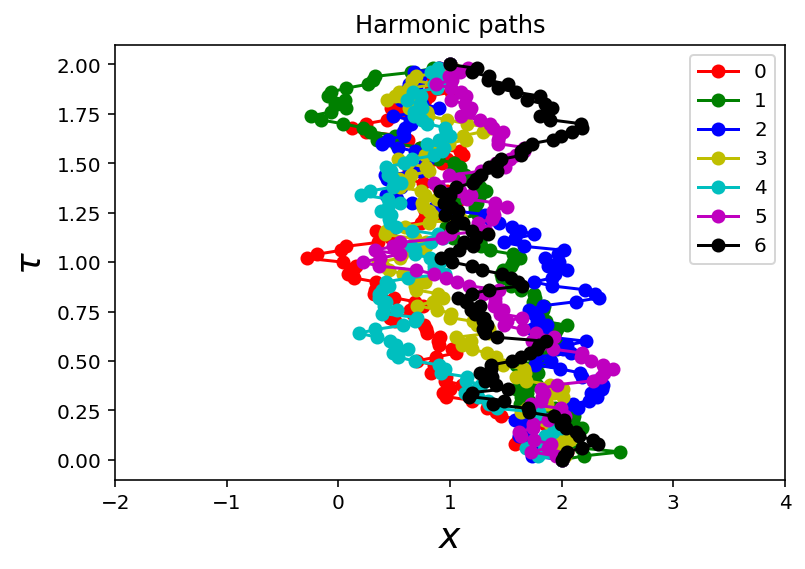

In [58]:
beta = 2.0
N = 100
dtau = beta / N
xstart, xend = 2.0, 1.0

colours=['r','g','b','y','c','m','k']

for step in range(len(colours)):
    
    x = [xstart]
    
    for k in range(1, N):
        
        dtau_prime = (N - k) * dtau
        
        Ups1 = 1.0 / np.tanh(dtau) + 1.0 / np.tanh(dtau_prime)
        
        Ups2 = x[k - 1] / np.sinh(dtau) + xend / np.sinh(dtau_prime)
        
        x.append(normal(Ups2 / Ups1, 1.0 / np.sqrt(Ups1)))
        
    x.append(xend)

    plt.plot(x, 
               [j * dtau for j in range(N + 1)],
               'o-',
               color=colours[step],
               label='{}'.format(step))
    plt.xlabel('$x$', fontsize=18)
    plt.ylabel('$\\tau$', fontsize=18)
    plt.title('Harmonic paths')
    plt.legend()
    plt.xlim(-2.0, 4.0)